<a href="https://colab.research.google.com/github/Thippawan72/Pytron_dataviz2023/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Member  
นางสาวทิพย์วัลย์  สุโพธิ์	643020062-6

นางสาวพิมชนก  วงศ์สายเชื้อ	643020510-5

นางสาววริศรา ปันลา 		643020519-7

นางสาววิภาดา  ห่วงสูงเนิน	643020520-2

นางสาวสุชาดา อุปพงษ์	643020524-4

นางสาวสุชานาถ พิลาภ	643021276-2


#จัดการข้อมูล

In [1]:
import numpy as np
import pandas as pd
import os

In [ ]:

from google.colab import drive # เชื่อมบัญชีกับ google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

ectreport = 'ectreport66.xlsx'   #ชื่อไฟล์ xlxs
data_ect = pd.ExcelFile('/content/drive/MyDrive/DataViz23Data/ectreport66.xlsx' )  #คำสั่งอ่านไฟล์ xlsx

data_ect.sheet_names  #คำสั่งเช็คไฟล์

['Schema',
 'result_constituencies_PartyList',
 'result_constituencies_Candidate',
 'result_constituencies_status',
 'info_province',
 'info_party_overview',
 'info_constituency',
 'Candidate_Constituency',
 'Candidate_PartyList',
 'Candidate_PM']

In [ ]:
# select sheet page by sheet name
Schema = data_ect.parse('Schema')
result_constituencies_PartyList = data_ect.parse('result_constituencies_PartyList')
result_constituencies_Candidate = data_ect.parse('result_constituencies_Candidate')
result_constituencies_status = data_ect.parse('result_constituencies_status')
info_province = data_ect.parse('info_province')
info_party_overview = data_ect.parse('info_party_overview')
info_constituency = data_ect.parse('info_constituency')
Candidate_constituency = data_ect.parse('Candidate_Constituency')
Candidate_partyList = data_ect.parse('Candidate_PartyList')
Candidate_pm = data_ect.parse('Candidate_PM')

In [ ]:
# เช็คค่าว่าง Null
print(result_constituencies_PartyList.isnull().any())
print(result_constituencies_Candidate.isnull().any())
print(result_constituencies_status.isnull().any())
print(info_province.isnull().any())
print(info_party_overview.isnull().any())
print(info_constituency.isnull().any())
print(Candidate_constituency.isnull().any())
print(Candidate_partyList.isnull().any())
print(Candidate_pm.isnull().any())


cons_id                    False
party_id                   False
party_list_vote            False
party_list_vote_percent    False
dtype: bool
cons_id                False
mp_app_id              False
mp_app_rank            False
mp_app_vote            False
mp_app_vote_percent    False
party_id               False
dtype: bool
prov_id                  False
cons_id                  False
turn_out                 False
percent_turn_out         False
counted_vote_stations    False
percent_count            False
pause_report             False
dtype: bool
province_id              False
prov_id                  False
province                 False
eng                      False
abbre_thai               False
total_registered_vote    False
total_vote_stations      False
dtype: bool
id          False
party_no     True
name        False
abbr        False
color       False
logo_url    False
dtype: bool
cons_id                False
cons_no                False
prov_id                False
regis

In [ ]:
#เช็คค่า Null
info_party_overview[info_party_overview['party_no'].isnull()] #แสดง row ที่มี party_no ว่าง

,id,party_no,name,abbr,color,logo_url
9,711,NaN,ประชาสามัคคี,ปส.,#ecb55e,https://cdn.ectreport.com/images/logos/ประชาสา...
11,713,NaN,พลังบูรพา,พบ.,#4696d6,https://cdn.ectreport.com/images/logos/พลังบูร...
17,720,NaN,รักษ์ธรรม,ร.ธ.,#dbdc9c,https://cdn.ectreport.com/images/logos/รักษ์ธร...


[เลือกตั้ง 2566 มีกี่พรรค? เช็กรายชื่อ-เบอร์พรรคการเมืองทั้งหมด ได้ที่นี่](https://www.thairath.co.th/news/politic/2693257?fbclid=IwAR1f7xTHH4xQ5cG4EVpOo2pfGYfCS1ZuZAvVwH1OKTpHBDFqHMKWH3NmhvA)

In [ ]:
#แทนค่าว่างด้วย 99 ที่ได้มาจากข้อมูลในอินเทอร์เน็ต
#ประชาสามัคคี,พลังบูรพา,รักษ์ธรรม party_no	= 99
info_party_overview['party_no'] = info_party_overview['party_no'].fillna(99)
info_party_overview[info_party_overview['party_no'].isnull()]

,id,party_no,name,abbr,color,logo_url



#คำถาม
* พรรคการเมืองที่ได้รับความนิยมมากที่สุดในแต่ละภาคของประเทศไทย จากข้อมูลการเลือกตั้ง ปี 2566 (แบ่งเป็น 4 ภาค)



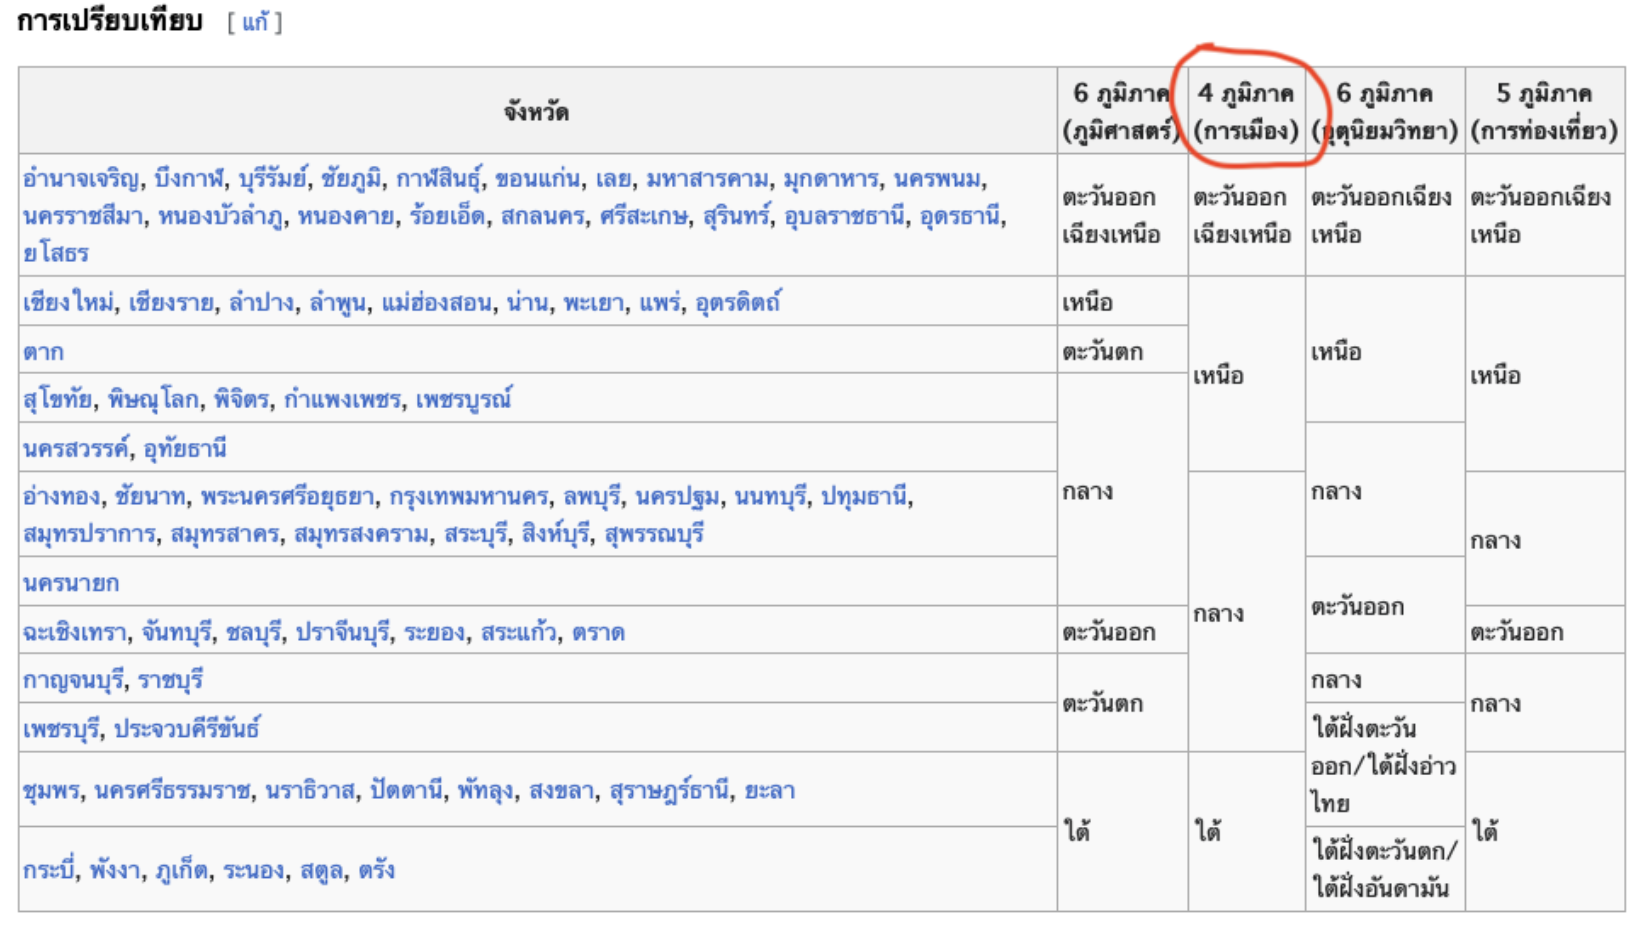

In [ ]:
#จำนวนผู้มาใช้สิทธิ์ทั้งหมด
result_constituencies_status['turn_out'].sum()

39284752

In [ ]:
#ผู้สมัครส.ส.
Candidate_constituency.head()

,mp_app_id,mp_app_name,mp_app_no,mp_app_party_id,image_url
0,ACR_1_1,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...
1,ACR_1_10,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...
2,ACR_1_11,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...
3,ACR_1_12,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...
4,ACR_1_13,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...


In [ ]:
#ชื่อพรรคที่สังกัด
info_party_overview.head()

,id,party_no,name,abbr,color,logo_url
0,701,26.0,ประชาธิปัตย์,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...
1,702,63.0,ประชากรไทย,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...
2,703,60.0,ความหวังใหม่,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...
3,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
4,706,14.0,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...


###Merge data

In [ ]:
# merge คะแนน vote ส.ส. กับ ข้อมูลผู้สมัครส.ส.
table_vote_candidate = result_constituencies_Candidate.merge(Candidate_constituency, how ='left', left_on='mp_app_id',right_on='mp_app_id')
print(table_vote_candidate.shape)
table_vote_candidate.head()

(4781, 10)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,mp_app_name,mp_app_no,mp_app_party_id,image_url
0,ACR_1,ACR_1_1,9,459,0.43477,706,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...
1,ACR_1,ACR_1_10,1,38275,36.25419,709,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...
2,ACR_1,ACR_1_11,13,126,0.11935,712,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...
3,ACR_1,ACR_1_12,12,127,0.12029,742,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...
4,ACR_1,ACR_1_13,11,212,0.20081,761,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...


In [ ]:
# merge คะแนน vote ส.ส. กับ ข้อมูลผู้สมัครส.ส. กับ พรรค
table_vote_candidate_party = table_vote_candidate.merge(info_party_overview, how ='left', left_on='party_id',right_on='id')
print(table_vote_candidate_party.shape)
table_vote_candidate_party.head()

(4781, 16)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,mp_app_name,mp_app_no,mp_app_party_id,image_url,id,party_no,name,abbr,color,logo_url
0,ACR_1,ACR_1_1,9,459,0.43477,706,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...,706,14.0,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...
1,ACR_1,ACR_1_10,1,38275,36.25419,709,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...
2,ACR_1,ACR_1_11,13,126,0.11935,712,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...,712,2.0,ประชาธิปไตยใหม่,ปธม.,#eb4138,https://cdn.ectreport.com/images/logos/ประชาธิ...
3,ACR_1,ACR_1_12,12,127,0.12029,742,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...,742,61.0,คลองไทย,คล.ท.,#0eafeb,https://cdn.ectreport.com/images/logos/คลองไทย...
4,ACR_1,ACR_1_13,11,212,0.20081,761,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...,761,5.0,พลังสังคมใหม่,พ.ส.ม.,#eabcc3,https://cdn.ectreport.com/images/logos/พลังสัง...


In [ ]:
# merge คะแนน vote ส.ส. กับ ข้อมูลผู้สมัครส.ส. กับ พรรค กับ ผู้มาใช้สิทธิ์เลือกตั้ง
table_vote_candidate_party_status = table_vote_candidate_party.merge(result_constituencies_status, how ='left', left_on='cons_id',right_on='cons_id')
print(table_vote_candidate_party_status.shape)
table_vote_candidate_party_status.head()

(4781, 22)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,mp_app_name,mp_app_no,mp_app_party_id,image_url,...,name,abbr,color,logo_url,prov_id,turn_out,percent_turn_out,counted_vote_stations,percent_count,pause_report
0,ACR_1,ACR_1_1,9,459,0.43477,706,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...,...,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...,ACR,105574,72.60136,310,100.0,False
1,ACR_1,ACR_1_10,1,38275,36.25419,709,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...,...,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...,ACR,105574,72.60136,310,100.0,False
2,ACR_1,ACR_1_11,13,126,0.11935,712,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...,...,ประชาธิปไตยใหม่,ปธม.,#eb4138,https://cdn.ectreport.com/images/logos/ประชาธิ...,ACR,105574,72.60136,310,100.0,False
3,ACR_1,ACR_1_12,12,127,0.12029,742,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...,...,คลองไทย,คล.ท.,#0eafeb,https://cdn.ectreport.com/images/logos/คลองไทย...,ACR,105574,72.60136,310,100.0,False
4,ACR_1,ACR_1_13,11,212,0.20081,761,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...,...,พลังสังคมใหม่,พ.ส.ม.,#eabcc3,https://cdn.ectreport.com/images/logos/พลังสัง...,ACR,105574,72.60136,310,100.0,False


In [ ]:
# merge คะแนน vote ส.ส. กับ ข้อมูลผู้สมัครส.ส. กับ พรรค กับ ผู้มาใช้สิทธิ์เลือกตั้ง กับ จังหวัด
table_vote_candidate_party_status_province = table_vote_candidate_party_status.merge(info_province, how ='left', left_on='prov_id',right_on='prov_id')
print(table_vote_candidate_party_status_province .shape)
table_vote_candidate_party_status_province .head()

(4781, 28)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,mp_app_name,mp_app_no,mp_app_party_id,image_url,...,percent_turn_out,counted_vote_stations,percent_count,pause_report,province_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations
0,ACR_1,ACR_1_1,9,459,0.43477,706,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
1,ACR_1,ACR_1_10,1,38275,36.25419,709,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
2,ACR_1,ACR_1_11,13,126,0.11935,712,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
3,ACR_1,ACR_1_12,12,127,0.12029,742,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
4,ACR_1,ACR_1_13,11,212,0.20081,761,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641


#แบ่งจังหวัดตาม 4 ภูมิภาค (ทางการเมือง)

In [ ]:
# สร้างพจนานุกรมว่างๆ
regions = {}

# สร้างพจนานุกรมพร้อมข้อมูล
regions = {
    'กลาง': ['อ่างทอง', 'ชัยนาท', 'พระนครศรีอยุธยา', 'กรุงเทพมหานคร', 'ลพบุรี', 'นครปฐม', 'นนทบุรี', 'ปทุมธานี', 'สมุทรปราการ', 'สมุทรสาคร', 'สมุทรสงคราม', 'สระบุรี', 'สิงห์บุรี', 'สุพรรณบุรี'],
    'เหนือ': ['เชียงใหม่', 'เชียงราย', 'ลำปาง', 'ลำพูน', 'แม่ฮ่องสอน', 'น่าน', 'พะเยา', 'แพร่', 'อุตรดิตถ์', 'ตาก', 'สุโขทัย', 'พิษณุโลก', 'พิจิตร', 'กำแพงเพชร', 'เพชรบูรณ์', 'นครสวรรค์', 'อุทัยธานี'],
    'ใต้': ['ชุมพร', 'นครศรีธรรมราช', 'นราธิวาส', 'ปัตตานี', 'พัทลุง', 'สงขลา', 'สุราษฎร์ธานี', 'ยะลา', 'กระบี่', 'พังงา', 'ภูเกต', 'ระนอง', 'สตูล', 'ตรัง'],
    'ตะวันออกเฉียงเหนือ': ['อำนาจเจริญ', 'บึงกาฬ', 'บุรีรัมย์', 'ชัยภูมิ', 'กาฬสินธุ์', 'ขอนแก่น', 'เลย', 'มหาสารคาม', 'มุกดาหาร', 'นครพนม', 'นครราชสีมา', 'หนองบัวลำภู', 'หนองคาย', 'ร้อยเอ็ด', 'สกลนคร', 'ศรีสะเกษ', 'สุรินทร์', 'อุบลราชธานี', 'อุดรธานี', 'ยโสธร']
}


In [ ]:
print(regions["กลาง"])

['อ่างทอง', 'ชัยนาท', 'พระนครศรีอยุธยา', 'กรุงเทพมหานคร', 'ลพบุรี', 'นครปฐม', 'นนทบุรี', 'ปทุมธานี', 'สมุทรปราการ', 'สมุทรสาคร', 'สมุทรสงคราม', 'สระบุรี', 'สิงห์บุรี', 'สุพรรณบุรี']


In [ ]:
data_TH = [{'จังหวัด':'อำนาจเจริญ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'บึงกาฬ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'บุรีรัมย์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ชัยภูมิ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'กาฬสินธุ์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ขอนแก่น','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'เลย','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'มหาสารคาม','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'มุกดาหาร','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'นครพนม','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'นครราชสีมา','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'หนองบัวลำภู','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'หนองคาย','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ร้อยเอ็ด','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'สกลนคร','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ศรีสะเกษ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'สุรินทร์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'อุบลราชธานี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'อุดรธานี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ยโสธร','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'เชียงใหม่','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'เชียงราย','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'ลำปาง','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'ลำพูน','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'แม่ฮ่องสอน','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'น่าน','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'พะเยา','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'แพร่','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'อุตรดิตถ์','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'ตาก','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'สุโขทัย','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'พิษณุโลก','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'พิจิตร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'กำแพงเพชร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'เพชรบูรณ์','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'นครสวรรค์','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'อุทัยธานี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'อ่างทอง','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ชัยนาท','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'พระนครศรีอยุธยา','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'กรุงเทพมหานคร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ลพบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'นครปฐม','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'นนทบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ปทุมธานี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สมุทรปราการ','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สมุทรสาคร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สมุทรสงคราม','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สระบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สิงห์บุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สุพรรณบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'นครนายก','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ฉะเชิงเทรา','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'จันทบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ชลบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ปราจีนบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ระยอง','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'สระแก้ว','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ตราด','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'กาญจนบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ราชบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'เพชรบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ประจวบคีรีขันธ์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ชุมพร','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'นครศรีธรรมราช','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'นราธิวาส','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ปัตตานี','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'พัทลุง','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'สงขลา','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'สุราษฎร์ธานี','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ยะลา','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'กระบี่','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'พังงา','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ภูเก็ต','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ระนอง','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'สตูล','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ตรัง','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
             ] # สร้าง list ขึ้นมา

In [ ]:
data_TH_df = pd.DataFrame(data_TH)
data_TH_df

,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
...,...,...,...,...,...
72,พังงา,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
73,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
74,ระนอง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
75,สตูล,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


In [ ]:
!pip install folium

In [ ]:
import folium # package สำหรับ visualize interactive map

In [ ]:
!pip install geopandas

In [ ]:
import geopandas # For working with geographical data
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
th_geojson = geopandas.read_file('/content/drive/MyDrive/Data-Viz-2023-2/thai.json')
print(th_geojson.shape)
th_geojson.head()

ERROR:fiona._env:/content/drive/MyDrive/Data-Viz-2023-2/thai.json: No such file or directory


DriverError: ignored

In [ ]:
th_geojson = geopandas.read_file('/content/drive/MyDrive/DataViz23Data/Data-Viz-2023-2/thai.json')
print(th_geojson.shape)
th_geojson.head()

(77, 2)


,name,geometry
0,Mae Hong Son,"POLYGON ((98.47780 19.70563, 98.48260 19.66410..."
1,Chumphon,"POLYGON ((99.50343 10.99705, 99.51157 10.86636..."
2,Nakhon Si Thammarat,"POLYGON ((100.12963 7.80172, 100.04457 7.82446..."
3,Phuket,"POLYGON ((98.41863 7.90375, 98.43165 7.91743, ..."
4,Phang-nga,"MULTIPOLYGON (((98.53631 8.11514, 98.60239 8.0..."


In [ ]:
th_geojson

,name,geometry
0,Mae Hong Son,"POLYGON ((98.47780 19.70563, 98.48260 19.66410..."
1,Chumphon,"POLYGON ((99.50343 10.99705, 99.51157 10.86636..."
2,Nakhon Si Thammarat,"POLYGON ((100.12963 7.80172, 100.04457 7.82446..."
3,Phuket,"POLYGON ((98.41863 7.90375, 98.43165 7.91743, ..."
4,Phang-nga,"MULTIPOLYGON (((98.53631 8.11514, 98.60239 8.0..."
...,...,...
72,Nakhon Phanom,"POLYGON ((104.75791 16.81889, 104.73452 16.804..."
73,Mukdahan,"POLYGON ((104.75791 16.81889, 104.77901 16.704..."
74,Narathiwat,"POLYGON ((101.72350 6.57438, 101.80836 6.46454..."
75,Pattani,"POLYGON ((101.72350 6.57438, 101.67837 6.57712..."


<Axes: >

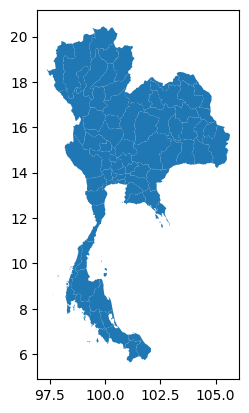

In [ ]:
th_geojson.plot()

In [ ]:
import folium  #แสดงพื้นที่จังหวัดเดียว (จังหวัดอุบลราชธานี)
from folium import Figure

import json

# โค้ดอื่น ๆ ที่คุณกำลังใช้

# Create a Figure object with specific dimensions
fig2 = Figure(width=550, height=350)

# Create a Folium map centered at a location within Thailand
map = folium.Map(location=[13.736717, 100.523186], zoom_start=4.5)

# Customize the style of the GeoJSON features based on a condition (e.g., province name)
def style_function(feature):
    province_name = feature['properties']['name']
    if province_name == 'Ubon Ratchathani':
        return {'fillColor': 'red', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
    else:
        return {'fillColor': 'blue', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}

# Add the GeoJSON layer to the map with customized styling
folium.GeoJson(th_geojson, style_function=style_function).add_to(map)

# Add the map to the Figure
fig2.add_child(map)


In [ ]:
pip install folium


In [ ]:
import folium    #พังงาไม่ใช่ลูกรักกูเกิ้ลแมพ #SAVEพังงา
from folium import Figure
import json

# Create a Figure object with specific dimensions
fig2 = Figure(width=550, height=350)

# Create a Folium map centered at a location within Thailand
map = folium.Map(location=[13.736717, 100.523186], zoom_start=4.5)

# Customize the style of the GeoJSON features based on a condition (e.g., province name)
def style_function(feature):
    province_name = feature['properties']['name']
    target_provinces = [ 'Phang Nga']
    if province_name in target_provinces:
        return {'fillColor': 'red', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
    else:
        return {'fillColor': 'blue', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}

# Add the GeoJSON layer to the map with customized styling
folium.GeoJson(th_geojson, style_function=style_function).add_to(map)

# Add the map to the Figure
fig2.add_child(map)


#สร้างข้อมูลภูมิภาค


#ลองโค้ด

In [ ]:
import pandas as pd
# Select the 'mp_app_vote','name' and 'province' columns
vote_prov_columns = table_vote_candidate_party_status_province[['name','mp_app_vote', 'province']]

# Display the selected columns
print(vote_prov_columns)

                 name  mp_app_vote    province
0       ชาติพัฒนากล้า          459  อำนาจเจริญ
1           ภูมิใจไทย        38275  อำนาจเจริญ
2     ประชาธิปไตยใหม่          126  อำนาจเจริญ
3             คลองไทย          127  อำนาจเจริญ
4       พลังสังคมใหม่          212  อำนาจเจริญ
...               ...          ...         ...
4776        ภูมิใจไทย        37946       ยโสธร
4777  รวมไทยสร้างชาติ          821       ยโสธร
4778  ประชาธิปไตยใหม่          531       ยโสธร
4779         ไทยภักดี          296       ยโสธร
4780          ก้าวไกล        14502       ยโสธร

[4781 rows x 3 columns]


In [ ]:
max_votes_by_province = (
    vote_prov_columns
    .sort_values(by='mp_app_vote', ascending=False)
    .groupby('province')
    .head(20)
)
# Display the result
print(max_votes_by_province)


                  name  mp_app_vote     province
4301      พลังประชารัฐ        63185         ตรัง
4358    เพื่อไทรวมพลัง        63127  อุบลราชธานี
960            ก้าวไกล        62009    เชียงใหม่
1077          เพื่อไทย        61414      ชัยภูมิ
3335          เพื่อไทย        61288     ร้อยเอ็ด
...                ...          ...          ...
2923           คลองไทย          135        พังงา
2708          ไทยภักดี          121      นครนายก
3559      เพื่อชาติไทย          120  สมุทรสงคราม
3385          ช่วยชาติ           90        ระนอง
2700  ภาคีเครือข่ายไทย           77      นครนายก

[1490 rows x 3 columns]


#---------------------------------------------------

In [ ]:
import pandas as pd

# Sample data with provinces
province_data = [
    'Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon',
    'Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani',
    'Bangkok', 'Kamphaeng Phet', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Sawan', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya', 'Phichit', 'Phitsanulok', 'Phetchabun', 'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri', 'Sukhothai', 'Suphan Buri', 'Ang Thong', 'Uthai Thani',
    'Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit', 'Tak', 'Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan'
]

# Create a DataFrame
province_df = pd.DataFrame(province_data, columns=['Province'])

# Define regions based on province groupings
region_mapping = {
    'ภาคตะวันออกเฉียงเหนือ': ['Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon'],
    'ภาคใต้': ['Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani'],
    'ภาคกลาง': ['Bangkok', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya',   'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri',  'Suphan Buri', 'Ang Thong','Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan'],
    'ภาคเหนือ': ['Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit','Tak','Sukhothai','Phichit', 'Phitsanulok','Phetchabun', 'Kamphaeng Phet', 'Nakhon Sawan', 'Uthai Thani']
}

# Create a Region column based on the region_mapping
province_df['Region'] = province_df['Province'].apply(
    lambda x: next((region for region, provinces in region_mapping.items() if x in provinces), None)
)

# Display the DataFrame
print(province_df)


               Province                 Region
0         Amnat Charoen  ภาคตะวันออกเฉียงเหนือ
1              Buri Ram  ภาคตะวันออกเฉียงเหนือ
2             Bueng Kan  ภาคตะวันออกเฉียงเหนือ
3            Chaiyaphum  ภาคตะวันออกเฉียงเหนือ
4               Kalasin  ภาคตะวันออกเฉียงเหนือ
..                  ...                    ...
72                 Trat                ภาคกลาง
73         Kanchanaburi                ภาคกลาง
74           Ratchaburi                ภาคกลาง
75          Phetchaburi                ภาคกลาง
76  Prachuap Khiri Khan                ภาคกลาง

[77 rows x 2 columns]


In [ ]:
# ใช้ฟังก์ชัน len() เพื่อนับจำนวนแถวใน DataFrame
num_provinces = len(province_df)

# แสดงจำนวนจังหวัด
print(f"จำนวนจังหวัด: {num_provinces} จังหวัด")


จำนวนจังหวัด: 77 จังหวัด


In [ ]:
import pandas as pd

# Sample data with provinces
province_data = [
  'Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon',
    'Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani',
    'Bangkok', 'Kamphaeng Phet', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Sawan', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya', 'Phichit', 'Phitsanulok', 'Phetchabun', 'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri', 'Sukhothai', 'Suphan Buri', 'Ang Thong', 'Uthai Thani',
    'Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit', 'Tak', 'Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan'
]


# Create a DataFrame with a single 'Province' column
province_df = pd.DataFrame(province_data, columns=['Province'])

# Display the DataFrame
print(province_df)


               Province
0         Amnat Charoen
1              Buri Ram
2             Bueng Kan
3            Chaiyaphum
4               Kalasin
..                  ...
72                 Trat
73         Kanchanaburi
74           Ratchaburi
75          Phetchaburi
76  Prachuap Khiri Khan

[77 rows x 1 columns]


In [ ]:
import pandas as pd

# Sample data with provinces and regions
province_data = [
  'Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon',
    'Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani',
    'Bangkok', 'Kamphaeng Phet', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Sawan', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya', 'Phichit', 'Phitsanulok', 'Phetchabun', 'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri', 'Sukhothai', 'Suphan Buri', 'Ang Thong', 'Uthai Thani',
    'Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit', 'Tak', 'Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan'
]


# Create a DataFrame with a single 'Province' column
province_df = pd.DataFrame(province_data, columns=['Province'])

# Define regions based on province groupings
region_mapping = {
    'ภาคตะวันออกเฉียงเหนือ': ['Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon'],
    'ภาคใต้': ['Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani'],
    'ภาคกลาง': ['Bangkok', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya',   'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri',  'Suphan Buri', 'Ang Thong','Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan'],
    'ภาคเหนือ': ['Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit','Tak','Sukhothai','Phichit', 'Phitsanulok','Phetchabun', 'Kamphaeng Phet', 'Nakhon Sawan', 'Uthai Thani']
}


# Create a Region column based on the region_mapping
province_df['Region'] = province_df['Province'].apply(
    lambda x: next((region for region, provinces in region_mapping.items() if x in provinces), None)
)

# Group by 'Region' and count the number of provinces in each region
region_counts = province_df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Number of Provinces']

# Display the region counts table
print(region_counts)


                  Region  Number of Provinces
0                ภาคกลาง                   26
1  ภาคตะวันออกเฉียงเหนือ                   20
2               ภาคเหนือ                   17
3                 ภาคใต้                   14


In [ ]:
# Check the region of the province "Bangkok"
province_name = "Tak"

# Define the region mapping
region_mapping = {
  'ภาคตะวันออกเฉียงเหนือ': ['Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon'],
    'ภาคใต้': ['Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani'],
    'ภาคกลาง': ['Bangkok', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya',   'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri',  'Suphan Buri', 'Ang Thong','Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan'],
    'ภาคเหนือ': ['Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit','Tak','Sukhothai','Phichit', 'Phitsanulok','Phetchabun', 'Kamphaeng Phet', 'Nakhon Sawan', 'Uthai Thani']
}


# Find the region of the province "Bangkok"
region_of_bangkok = next((region for region, provinces in region_mapping.items() if province_name in provinces), None)

# Print the region of Bangkok
if region_of_bangkok:
    print(f"The province {province_name} is in the region {region_of_bangkok}.")
else:
    print(f"The region of {province_name} is not found in the mapping.")


The province Tak is in the region ภาคเหนือ.


##ภาคตะวันออกเฉียงเหนือ

In [ ]:
import folium    #ไม่มี  'Nong Bua Lamphu
from folium import Figure
import json

# Create a Figure object with specific dimensions
fig2 = Figure(width=550, height=350)

# Create a Folium map centered at a location within Thailand
map = folium.Map(location=[13.736717, 100.523186], zoom_start=4.5)

# List of provinces in the Northeastern region
northeastern_provinces = ['Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon']
# Customize the style of the GeoJSON features based on the province's region
def style_function(feature):
    province_name = feature['properties']['name']
    if province_name in northeastern_provinces:
        return {'fillColor': 'red', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
    else:
        return {'fillColor': 'blue', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}

# Add the GeoJSON layer to the map with customized styling
folium.GeoJson(th_geojson, style_function=style_function).add_to(map)

# Add the map to the Figure
fig2.add_child(map)


##ภาคใต้

In [ ]:
import folium
from folium import Figure
import json

# Create a Figure object with specific dimensions
fig2 = Figure(width=550, height=350)

# Create a Folium map centered at a location within Thailand
map = folium.Map(location=[13.736717, 100.523186], zoom_start=4.5)

# List of provinces in the Northern region
southern_provinces =  ['Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani']

# Customize the style of the GeoJSON features based on the province's region
def style_function(feature):
    province_name = feature['properties']['name']
    if province_name in southern_provinces:
        return {'fillColor': 'red', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
    else:
        return {'fillColor': 'blue', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}

# Add the GeoJSON layer to the map with customized styling
folium.GeoJson(th_geojson, style_function=style_function).add_to(map)

# Add the map to the Figure
fig2.add_child(map)


##ภาคกลาง

In [ ]:
import folium
from folium import Figure
import json

# Create a Figure object with specific dimensions
fig2 = Figure(width=550, height=350)

# Create a Folium map centered at a location within Thailand
map = folium.Map(location=[13.736717, 100.523186], zoom_start=4.5)

# List of provinces in the Central region
central_provinces = ['Bangkok', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya',   'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri',  'Suphan Buri', 'Ang Thong','Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan']
def style_function(feature):
    province_name = feature['properties']['name']
    if province_name in central_provinces:
        return {'fillColor': 'red', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
    else:
        return {'fillColor': 'blue', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}

# Add the GeoJSON layer to the map with customized styling
folium.GeoJson(th_geojson, style_function=style_function).add_to(map)

# Add the map to the Figure
fig2.add_child(map)

#ไม่มี	'Kamphaeng Phet	',	'Chai Nat'


##ภาคเหนือ

In [ ]:
import folium
from folium import Figure
import json

# Create a Figure object with specific dimensions
fig2 = Figure(width=550, height=350)

# Create a Folium map centered at a location within Thailand
map = folium.Map(location=[13.736717, 100.523186], zoom_start=4.5)

# Customize the style of the GeoJSON features based on a condition (e.g., province name)
def style_function(feature):
    province_name = feature['properties']['name']
    Northern_provinces =  ['Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit','Tak','Sukhothai','Phichit', 'Phitsanulok','Phetchabun', 'Kamphaeng Phet', 'Nakhon Sawan', 'Uthai Thani']

    if province_name in Northern_provinces:
        return {'fillColor': 'red', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
    else:
        return {'fillColor': 'blue', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}

# Add the GeoJSON layer to the map with customized styling
folium.GeoJson(th_geojson, style_function=style_function).add_to(map)

# Add the map to the Figure
fig2.add_child(map)


##รวม 4 ภูมิภาคทางการเมือง

In [ ]:
import folium
from folium import Figure
import json

# Create a Figure object with specific dimensions
fig2 = Figure(width=550, height=350)

# Create a Folium map centered at a location within Thailand
map = folium.Map(location=[13.736717, 100.523186], zoom_start=4.5)

# Customize the style of the GeoJSON features based on a condition (e.g., province name)
def style_function(feature):
    province_name = feature['properties']['name']
    Northern_provinces =  ['Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae', 'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit','Tak','Sukhothai','Phichit', 'Phitsanulok','Phetchabun', 'Kamphaeng Phet', 'Nakhon Sawan', 'Uthai Thani']
    central_provinces = ['Bangkok', 'Chai Nat', 'Nakhon Nayok', 'Nakhon Pathom', 'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya',   'Lop Buri', 'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi', 'Sing Buri',  'Suphan Buri', 'Ang Thong','Chachoengsao','Chanthaburi','Chon Buri','Prachin Buri','Rayong','Sa Kaeo','Trat','Kanchanaburi','Ratchaburi','Phetchaburi','Prachuap Khiri Khan']
    northeastern_provinces = ['Amnat Charoen', 'Buri Ram', 'Bueng Kan', 'Chaiyaphum', 'Kalasin', 'Khon Kaen', 'Loei', 'Maha Sarakham', 'Mukdahan', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nong Bua Lamphu', 'Nong Khai', 'Roi Et', 'Sakon Nakhon', 'Si Sa Ket', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Yasothon']
    southern_provinces =  ['Krabi', 'Chumphon', 'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phuket', 'Yala', 'Ranong', 'Songkhla', 'Satun', 'Surat Thani']
    if province_name in Northern_provinces:
        return {'fillColor': 'yellow', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}


    if province_name in central_provinces:
        return {'fillColor': 'red', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}


    if province_name in northeastern_provinces:
        return {'fillColor': 'green', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}


    if province_name in southern_provinces:
        return {'fillColor': 'blue', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
    else:
        return {'fillColor': 'pink', 'fillOpacity': 0.6, 'color': 'black', 'weight': 1.5}
# Add the GeoJSON layer to the map with customized styling
folium.GeoJson(th_geojson, style_function=style_function).add_to(map)

# Add the map to the Figure
fig2.add_child(map)


In [ ]:
# merge คะแนน vote ส.ส. กับ ข้อมูลผู้สมัครส.ส. กับ พรรค กับ ผู้มาใช้สิทธิ์เลือกตั้ง กับ จังหวัด
table_vote_candidate_party_status_province = table_vote_candidate_party_status.merge(info_province, how ='left', left_on='prov_id',right_on='prov_id')
print(table_vote_candidate_party_status_province .shape)
table_vote_candidate_party_status_province .head()

(4781, 28)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,mp_app_name,mp_app_no,mp_app_party_id,image_url,...,percent_turn_out,counted_vote_stations,percent_count,pause_report,province_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations
0,ACR_1,ACR_1_1,9,459,0.43477,706,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
1,ACR_1,ACR_1_10,1,38275,36.25419,709,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
2,ACR_1,ACR_1_11,13,126,0.11935,712,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
3,ACR_1,ACR_1_12,12,127,0.12029,742,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
4,ACR_1,ACR_1_13,11,212,0.20081,761,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...,...,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641


##Export Excel

In [ ]:
data_TH_df.drop(columns=['6 ภูมิภาค (ภูมิศาสตร์)','6 ภูมิภาค (อุตุนิยมวิทยา)','5 ภูมิภาค (การท่องเที่ยว)'], inplace=True)

In [ ]:
data_TH_df

,จังหวัด,4 ภูมิภาค (การเมือง)
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ
...,...,...
72,พังงา,ใต้
73,ภูเก็ต,ใต้
74,ระนอง,ใต้
75,สตูล,ใต้


In [ ]:
merge_data_region = table_vote_candidate_party_status_province.merge(data_TH_df, how ='left', left_on='province',right_on='จังหวัด')
merge_data_region .head()

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,mp_app_name,mp_app_no,mp_app_party_id,image_url,...,percent_count,pause_report,province_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations,จังหวัด,4 ภูมิภาค (การเมือง)
0,ACR_1,ACR_1_1,9,459,0.43477,706,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...,...,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,อำนาจเจริญ,ตะวันออกเฉียงเหนือ
1,ACR_1,ACR_1_10,1,38275,36.25419,709,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...,...,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,อำนาจเจริญ,ตะวันออกเฉียงเหนือ
2,ACR_1,ACR_1_11,13,126,0.11935,712,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...,...,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,อำนาจเจริญ,ตะวันออกเฉียงเหนือ
3,ACR_1,ACR_1_12,12,127,0.12029,742,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...,...,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,อำนาจเจริญ,ตะวันออกเฉียงเหนือ
4,ACR_1,ACR_1_13,11,212,0.20081,761,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...,...,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,อำนาจเจริญ,ตะวันออกเฉียงเหนือ


In [ ]:
excel_file_path = 'merge_data_region.xlsx'
# Export the 'merge_data_region' DataFrame to an Excel file
merge_data_region.to_excel(excel_file_path, index=False)

print(f'DataFrame has been exported to {excel_file_path}')

DataFrame has been exported to merge_data_region.xlsx


ดูว่าแต่ละภาคพรรคไหนเป็นที่นิยมมากที่สุด

In [ ]:
# Group the DataFrame by '4 ภูมิภาค (การเมือง)' and find the party with the maximum 'mp_app_vote' in each group
max_vote_by_region = merge_data_region.groupby('4 ภูมิภาค (การเมือง)').apply(lambda x: x.loc[x['mp_app_vote'].idxmax()])

# Reset the index to have a clean DataFrame
max_vote_by_region = max_vote_by_region.reset_index(drop=True)

tablemax_vote_by_region = max_vote_by_region[['4 ภูมิภาค (การเมือง)', 'name', 'mp_app_vote']]
tablemax_vote_by_region

,4 ภูมิภาค (การเมือง),name,mp_app_vote
0,กลาง,ก้าวไกล,60282
1,ตะวันออกเฉียงเหนือ,เพื่อไทรวมพลัง,63127
2,เหนือ,ก้าวไกล,62009
3,ใต้,พลังประชารัฐ,63185


In [ ]:
excel_file_path = 'max_vote_region.xlsx'
# Export the 'merge_data_region' DataFrame to an Excel file
max_vote_by_region.to_excel(excel_file_path, index=False)

print(f'DataFrame has been exported to {excel_file_path}')

DataFrame has been exported to max_vote_region.xlsx


In [ ]:
max_vote_by_province = merge_data_region.groupby('province').apply(lambda x: x.loc[x['mp_app_vote'].idxmax()])

max_vote_by_province = max_vote_by_province.reset_index(drop=True)

tablemax_vote_by_province = max_vote_by_province[['province', 'name', 'mp_app_vote']]
tablemax_vote_by_province

,province,name,mp_app_vote
0,กระบี่,ภูมิใจไทย,51845
1,กรุงเทพมหานคร,ก้าวไกล,50132
2,กาญจนบุรี,ภูมิใจไทย,44813
3,กาฬสินธุ์,เพื่อไทย,56559
4,กำแพงเพชร,พลังประชารัฐ,41143
...,...,...,...
72,เพชรบุรี,รวมไทยสร้างชาติ,40235
73,เพชรบูรณ์,พลังประชารัฐ,47118
74,เลย,เพื่อไทย,50421
75,แพร่,เพื่อไทย,41565


In [ ]:
excel_file_path = 'max_vote_by_province.xlsx'
# Export the 'merge_data_region' DataFrame to an Excel file
max_vote_by_province.to_excel(excel_file_path, index=False)

print(f'DataFrame has been exported to {excel_file_path}')

DataFrame has been exported to max_vote_by_province.xlsx


#Dashboard พรรคที่ได้รับความนิยมแต่ละภาค
https://lookerstudio.google.com/reporting/1eb23aea-051e-4e8a-83ff-cf51b3cbbf5c/page/p_z81d3xgoad/edit?fbclid=IwAR08TV4Vvr7QYPJvytalOsCHrnGG1E9rZDQTdI50nutKL2Xs8hsefhUfpd8